In [61]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
plt.style.use("fivethirtyeight")
%matplotlib inline

# For time stamps
from datetime import datetime

In [62]:
# The tech stocks we'll use for this analysis
pair_list = ['EURJPY', 'AUDUSD', 'BCOUSD', 'USDCAD', 'USDCHF', 'EURUSD', 'GBPUSD', 'USDJPY', 'NZDUSD', 'XAUUSD']

In [63]:
import glob

path = r'C:/Users/Hitesh/Desktop/LJMU/Forex Implementation/All/Clubbed/' 
all_files = glob.glob(path + "/*.csv")

all_data = []

for filename in all_files:
    df = pd.read_csv(filename)
    #df.columns = ['Index','Timestamp','Open','High','Low','Close','Volume']
    #df.drop(['Index','Timestamp'], axis=1, inplace=True)
    #df.drop(columns=['Volume','Open','High','Low'],inplace=True)
    #df['Name'] = os.path.basename(filename)
    all_data.append(df)

data = pd.concat(all_data, axis=0, ignore_index=True)

In [64]:
data.head()

Date  EURJPY  AUDUSD  BCOUSD  USDCAD  USDCHF  EURUSD  GBPUSD  USDJPY  \
0  1/3/2010  133.31  0.8996     NaN  1.0518  1.0395  1.4335  1.6147   93.08   
1  1/4/2010  133.77  0.9159     NaN  1.0487  1.0417  1.4451  1.6236   93.20   
2  1/5/2010  132.92  0.9172     NaN  1.0409  1.0356  1.4481  1.6151   92.15   
3  1/6/2010  133.47  0.9263     NaN  1.0406  1.0375  1.4443  1.6061   92.71   
4  1/7/2010  134.10  0.9226     NaN  1.0371  1.0367  1.4402  1.6003   93.75   

   NZDUSD   XAUUSD  
0  0.7251  1102.03  
1  0.7358  1123.70  
2  0.7389  1127.78  
3  0.7421  1140.10  
4  0.7384  1135.08

In [65]:
data.index = pd.to_datetime(data['Date'])
data.drop(columns=['Date'],inplace=True)
data.head()

EURJPY  AUDUSD  BCOUSD  USDCAD  USDCHF  EURUSD  GBPUSD  USDJPY  \
Date                                                                         
2010-01-03  133.31  0.8996     NaN  1.0518  1.0395  1.4335  1.6147   93.08   
2010-01-04  133.77  0.9159     NaN  1.0487  1.0417  1.4451  1.6236   93.20   
2010-01-05  132.92  0.9172     NaN  1.0409  1.0356  1.4481  1.6151   92.15   
2010-01-06  133.47  0.9263     NaN  1.0406  1.0375  1.4443  1.6061   92.71   
2010-01-07  134.10  0.9226     NaN  1.0371  1.0367  1.4402  1.6003   93.75   

            NZDUSD   XAUUSD  
Date                         
2010-01-03  0.7251  1102.03  
2010-01-04  0.7358  1123.70  
2010-01-05  0.7389  1127.78  
2010-01-06  0.7421  1140.10  
2010-01-07  0.7384  1135.08

In [66]:
len(pair_list)

10

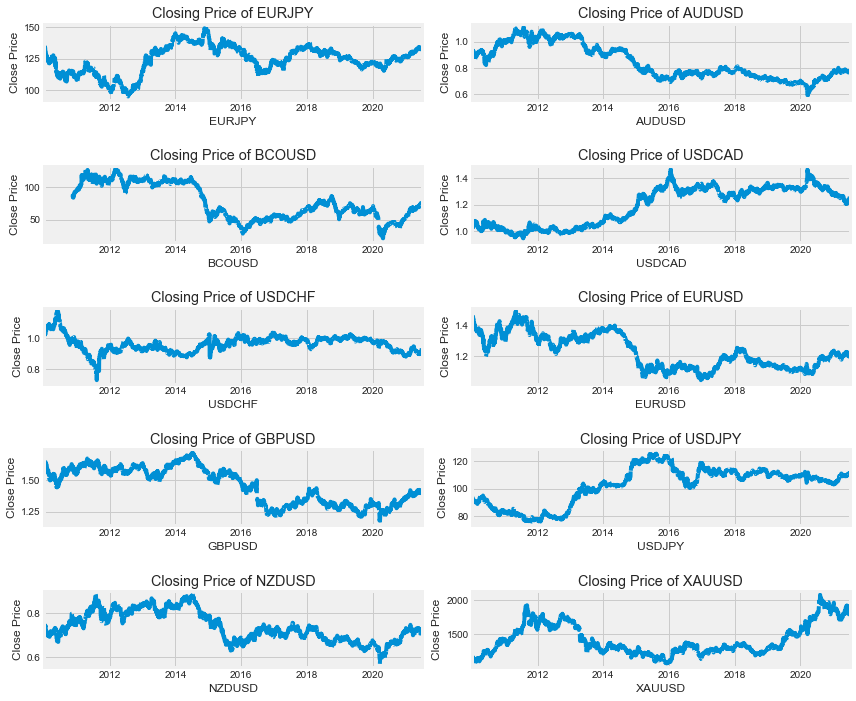

In [67]:
# Let's see a historical view of the closing price


plt.figure(figsize=(12,10))
plt.subplots_adjust(top=1.25, bottom=1.2)

for i in range(0, len(pair_list)):
    plt.subplot(5, 2, i+1)
    #data[data['Name']==pair_list[i]].Close.plot()
    data[pair_list[i]].plot()
    plt.ylabel('Close Price')
    plt.xlabel(pair_list[i])
    plt.title(f"Closing Price of {pair_list[i]}")
    
plt.tight_layout()

In [68]:
['EURJPY', 'AUDUSD', 'BCOUSD', 'USDCAD', 'USDCHF', 'EURUSD', 'GBPUSD', 'USDJPY', 'NZDUSD', 'XAUUSD']

['EURJPY',
 'AUDUSD',
 'BCOUSD',
 'USDCAD',
 'USDCHF',
 'EURUSD',
 'GBPUSD',
 'USDJPY',
 'NZDUSD',
 'XAUUSD']

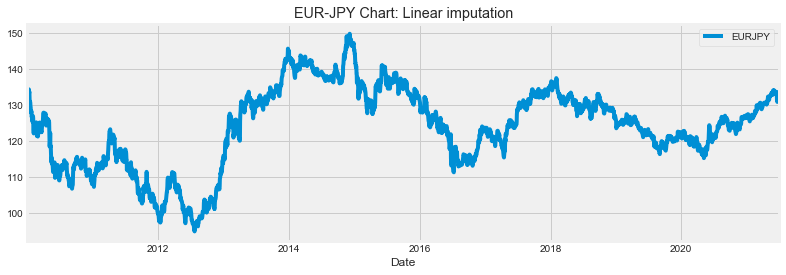

In [69]:
data = data.assign(EURJPY=data.EURJPY.interpolate(method='linear'))
data[['EURJPY']].plot(figsize=(12, 4))
plt.legend(loc='best')
plt.title('EUR-JPY Chart: Linear imputation')
plt.show(block=False)

In [70]:
data = data.assign(AUDUSD=data.AUDUSD.interpolate(method='linear'))
data = data.assign(BCOUSD=data.BCOUSD.interpolate(method='linear'))
data = data.assign(USDCAD=data.USDCAD.interpolate(method='linear'))
data = data.assign(USDCHF=data.USDCHF.interpolate(method='linear'))
data = data.assign(EURUSD=data.EURUSD.interpolate(method='linear'))
data = data.assign(GBPUSD=data.GBPUSD.interpolate(method='linear'))
data = data.assign(USDJPY=data.USDJPY.interpolate(method='linear'))
data = data.assign(NZDUSD=data.NZDUSD.interpolate(method='linear'))
data = data.assign(XAUUSD=data.XAUUSD.interpolate(method='linear'))

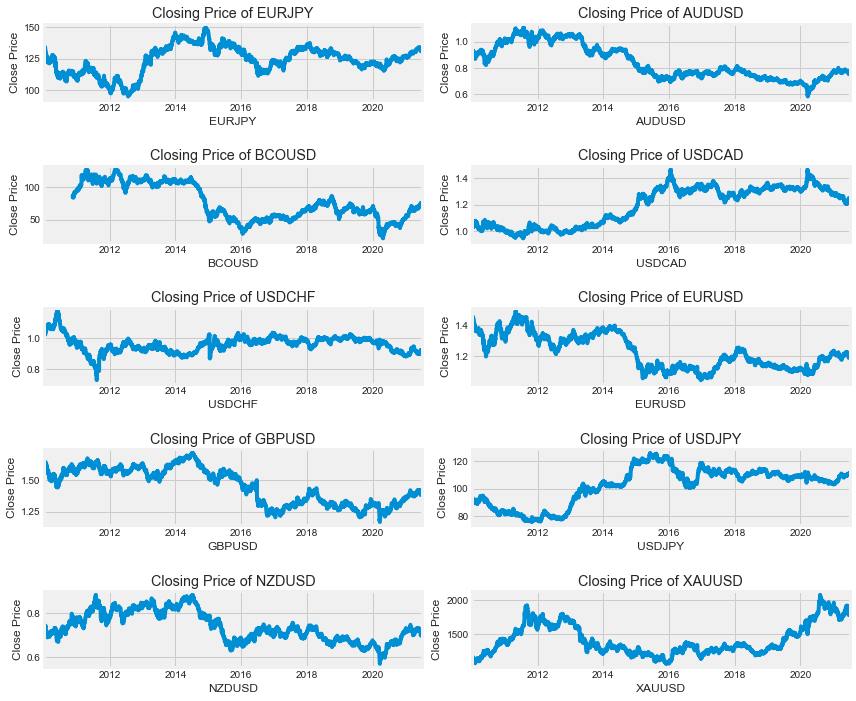

In [71]:
# Let's see a historical view of the closing price


plt.figure(figsize=(12,10))
plt.subplots_adjust(top=1.25, bottom=1.2)

for i in range(0, len(pair_list)):
    plt.subplot(5, 2, i+1)
    #data[data['Name']==pair_list[i]].Close.plot()
    data[pair_list[i]].plot()
    plt.ylabel('Close Price')
    plt.xlabel(pair_list[i])
    plt.title(f"Closing Price of {pair_list[i]}")
    
plt.tight_layout()

In [72]:
for i in range(0, len(pair_list)):
    column_name = f"10 Days MA for {pair_list[i]}"
    print(column_name)
    data[column_name] = data[pair_list[i]].rolling(10).mean()

10 Days MA for EURJPY
10 Days MA for AUDUSD
10 Days MA for BCOUSD
10 Days MA for USDCAD
10 Days MA for USDCHF
10 Days MA for EURUSD
10 Days MA for GBPUSD
10 Days MA for USDJPY
10 Days MA for NZDUSD
10 Days MA for XAUUSD


In [73]:
for i in range(0, len(pair_list)):
    column_name = f"20 Days MA for {pair_list[i]}"
    print(column_name)
    data[column_name] = data[pair_list[i]].rolling(20).mean()

20 Days MA for EURJPY
20 Days MA for AUDUSD
20 Days MA for BCOUSD
20 Days MA for USDCAD
20 Days MA for USDCHF
20 Days MA for EURUSD
20 Days MA for GBPUSD
20 Days MA for USDJPY
20 Days MA for NZDUSD
20 Days MA for XAUUSD


In [74]:
for i in range(0, len(pair_list)):
    column_name = f"50 Days MA for {pair_list[i]}"
    print(column_name)
    data[column_name] = data[pair_list[i]].rolling(50).mean()

50 Days MA for EURJPY
50 Days MA for AUDUSD
50 Days MA for BCOUSD
50 Days MA for USDCAD
50 Days MA for USDCHF
50 Days MA for EURUSD
50 Days MA for GBPUSD
50 Days MA for USDJPY
50 Days MA for NZDUSD
50 Days MA for XAUUSD


In [75]:
data.tail()

EURJPY    AUDUSD   BCOUSD    USDCAD   USDCHF    EURUSD   GBPUSD  \
Date                                                                           
2021-06-26  132.369  0.760495  75.9455  1.231465  0.91855  1.195765  1.39134   
2021-06-27  132.339  0.759410  75.7180  1.231290  0.91887  1.194150  1.38957   
2021-06-28  132.224  0.760050  75.4030  1.234810  0.92141  1.194380  1.39386   
2021-06-29  131.874  0.756380  74.9080  1.240290  0.92309  1.192230  1.38786   
2021-06-30  131.778  0.752650  75.2730  1.242220  0.92618  1.190790  1.38704   

             USDJPY   NZDUSD    XAUUSD  10 Days MA for EURJPY  \
Date                                                            
2021-06-26  110.854  0.70862  1786.258               131.9878   
2021-06-27  110.833  0.70778  1782.698               131.9386   
2021-06-28  110.972  0.70851  1785.608               132.0239   
2021-06-29  110.749  0.70364  1778.708               132.0988   
2021-06-30  111.159  0.70058  1775.838               132.1887   

            10 Days MA for AUDUSD  10 Days MA for BCOUSD  \
Date                                                       
2021-06-26               0.757651               75.07475   
2021-06-27               0.757247               75.20025   
2021-06-28               0.757739               75.37025   
2021-06-29               0.758013               75.46625   
2021-06-30               0.758061               75.57425   

            10 Days MA for USDCAD  10 Days MA for USDCHF  \
Date                                                       
2021-06-26               1.239937               0.921013   
2021-06-27               1.239318               0.921025   
2021-06-28               1.238008               0.920799   
2021-06-29               1.237264               0.920774   
2021-06-30               1.236727               0.921092   

            10 Days MA for EURUSD  10 Days MA for GBPUSD  \
Date                                                       
2021-06-26               1.194346               1.393704   
2021-06-27               1.193705               1.392581   
2021-06-28               1.193909               1.392693   
2021-06-29               1.194136               1.392704   
2021-06-30               1.194457               1.393132   

            10 Days MA for USDJPY  10 Days MA for NZDUSD  \
Date                                                       
2021-06-26              110.69875               0.704189   
2021-06-27              110.70615               0.704063   
2021-06-28              110.75595               0.704835   
2021-06-29              110.79510               0.705296   
2021-06-30              110.88690               0.705629   

            10 Days MA for XAUUSD  20 Days MA for EURJPY  \
Date                                                       
2021-06-26               1791.807              132.71160   
2021-06-27               1787.886              132.66125   
2021-06-28               1786.861              132.60180   
2021-06-29               1786.114              132.51475   
2021-06-30               1786.048              132.41665   

            20 Days MA for AUDUSD  20 Days MA for BCOUSD  \
Date                                                       
2021-06-26               0.765953              74.170875   
2021-06-27               0.765097              74.361875   
2021-06-28               0.764322              74.492375   
2021-06-29               0.763334              74.596625   
2021-06-30               0.762153              74.717625   

            20 Days MA for USDCAD  20 Days MA for USDCHF  \
Date                                                       
2021-06-26               1.228208               0.910708   
2021-06-27               1.229242               0.911602   
2021-06-28               1.230398               0.912735   
2021-06-29               1.231799               0.914037   
2021-06-30               1.233291               0.915398   

            20 Days MA for EURUSD  20 Days MA for

In [76]:
pd.set_option('display.max_columns', 100)

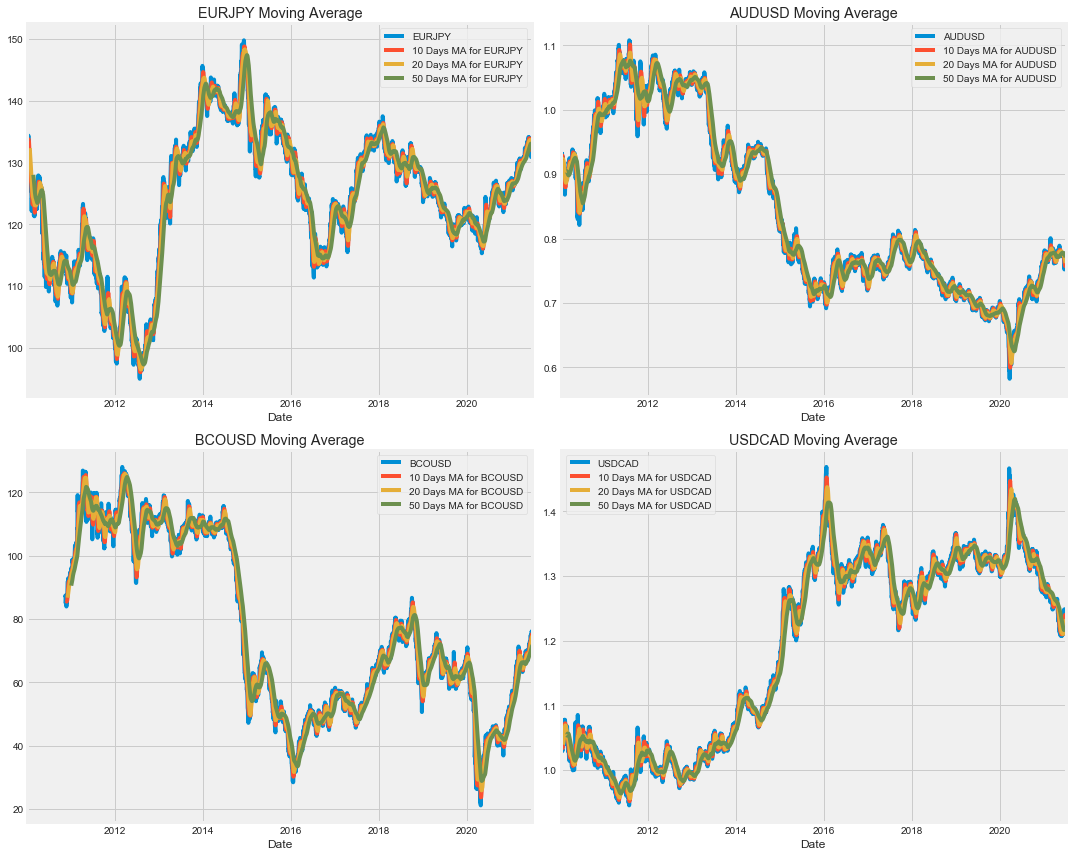

In [77]:
fig, axes = plt.subplots(nrows=2, ncols=2)
fig.set_figheight(12)
fig.set_figwidth(15)


data[['EURJPY', '10 Days MA for EURJPY', '20 Days MA for EURJPY', '50 Days MA for EURJPY']].plot(ax=axes[0,0])
axes[0,0].set_title('EURJPY Moving Average')

data[['AUDUSD', '10 Days MA for AUDUSD', '20 Days MA for AUDUSD', '50 Days MA for AUDUSD']].plot(ax=axes[0,1])
axes[0,1].set_title('AUDUSD Moving Average')

data[['BCOUSD', '10 Days MA for BCOUSD', '20 Days MA for BCOUSD', '50 Days MA for BCOUSD']].plot(ax=axes[1,0])
axes[1,0].set_title('BCOUSD Moving Average')

data[['USDCAD', '10 Days MA for USDCAD', '20 Days MA for USDCAD', '50 Days MA for USDCAD']].plot(ax=axes[1,1])
axes[1,1].set_title('USDCAD Moving Average')

fig.tight_layout()

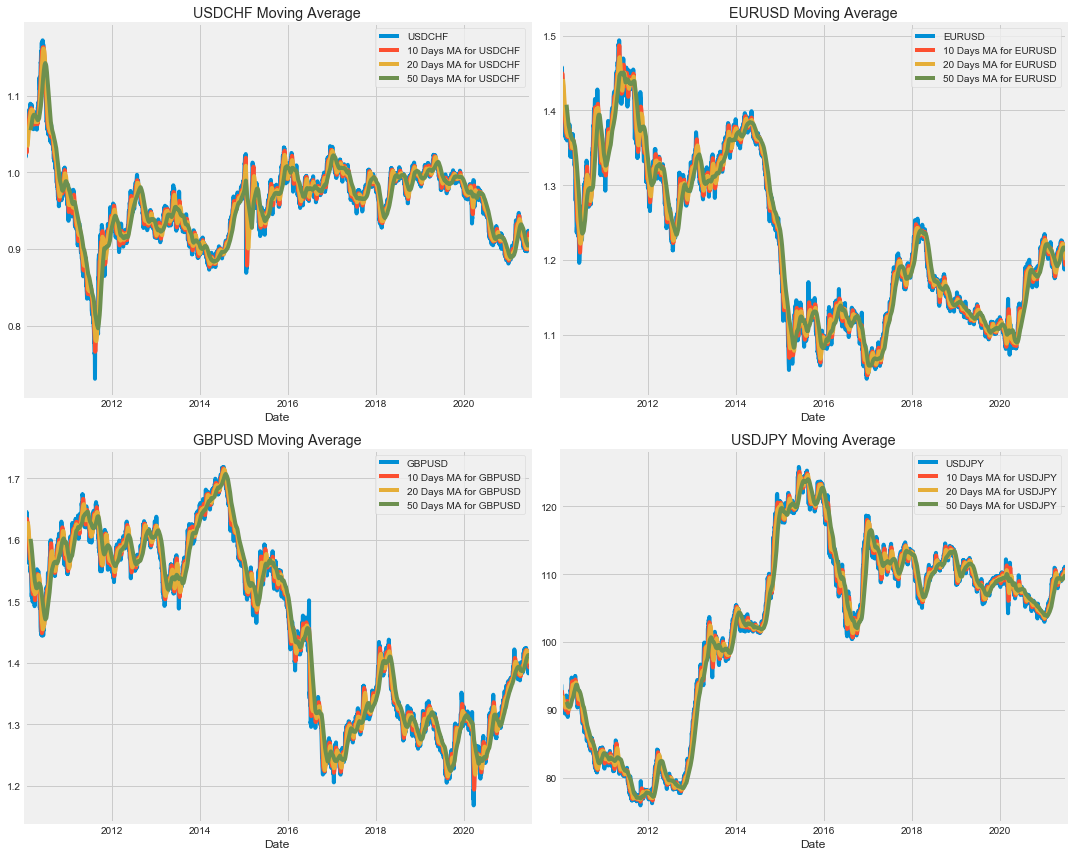

In [78]:
fig, axes = plt.subplots(nrows=2, ncols=2)
fig.set_figheight(12)
fig.set_figwidth(15)

data[['USDCHF', '10 Days MA for USDCHF', '20 Days MA for USDCHF', '50 Days MA for USDCHF']].plot(ax=axes[0,0])
axes[0,0].set_title('USDCHF Moving Average')

data[['EURUSD', '10 Days MA for EURUSD', '20 Days MA for EURUSD', '50 Days MA for EURUSD']].plot(ax=axes[0,1])
axes[0,1].set_title('EURUSD Moving Average')

data[['GBPUSD', '10 Days MA for GBPUSD', '20 Days MA for GBPUSD', '50 Days MA for GBPUSD']].plot(ax=axes[1,0])
axes[1,0].set_title('GBPUSD Moving Average')

data[['USDJPY', '10 Days MA for USDJPY', '20 Days MA for USDJPY', '50 Days MA for USDJPY']].plot(ax=axes[1,1])
axes[1,1].set_title('USDJPY Moving Average')

fig.tight_layout()

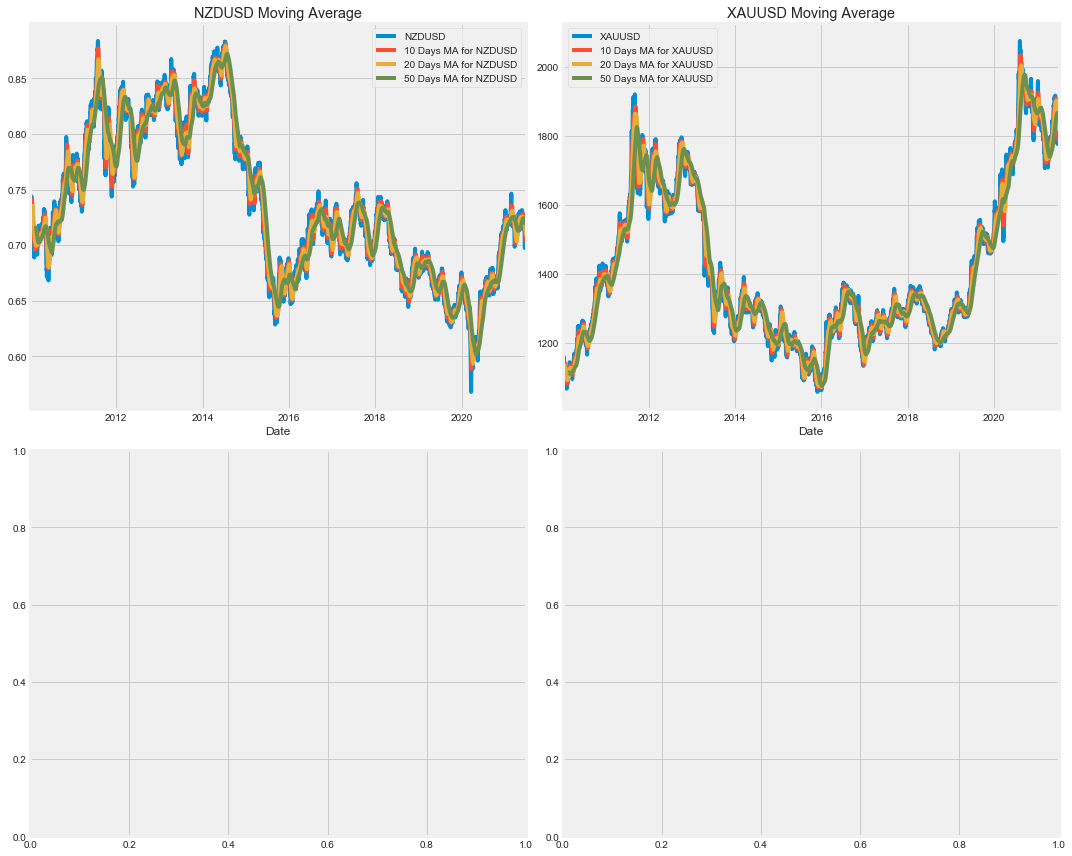

In [79]:
fig, axes = plt.subplots(nrows=2, ncols=2)
fig.set_figheight(12)
fig.set_figwidth(15)

data[['NZDUSD', '10 Days MA for NZDUSD', '20 Days MA for NZDUSD', '50 Days MA for NZDUSD']].plot(ax=axes[0,0])
axes[0,0].set_title('NZDUSD Moving Average')

data[['XAUUSD', '10 Days MA for XAUUSD', '20 Days MA for XAUUSD', '50 Days MA for XAUUSD']].plot(ax=axes[0,1])
axes[0,1].set_title('XAUUSD Moving Average')

fig.tight_layout()

In [80]:
for i in range(0, len(pair_list)):
    column_name = f"Daily Return {pair_list[i]}"
    print(column_name)
    data[column_name] = data[pair_list[i]].pct_change()

Daily Return EURJPY
Daily Return AUDUSD
Daily Return BCOUSD
Daily Return USDCAD
Daily Return USDCHF
Daily Return EURUSD
Daily Return GBPUSD
Daily Return USDJPY
Daily Return NZDUSD
Daily Return XAUUSD


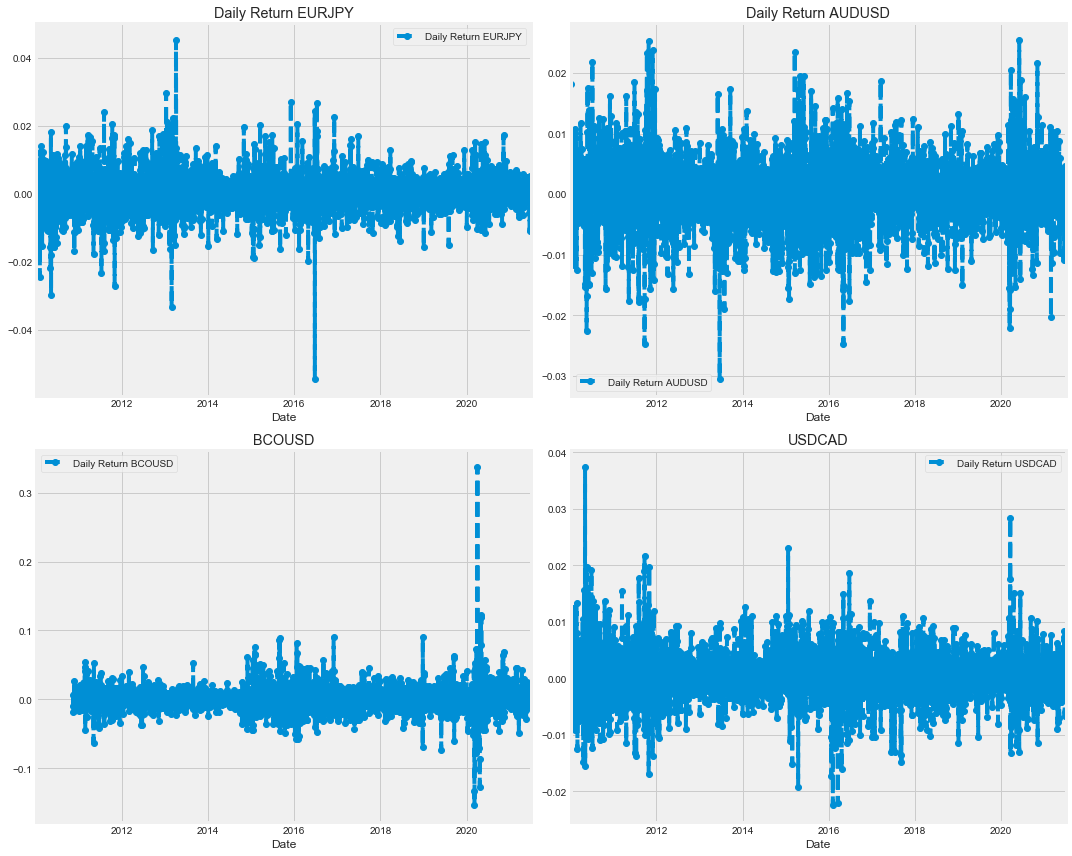

In [81]:
fig, axes = plt.subplots(nrows=2, ncols=2)
fig.set_figheight(12)
fig.set_figwidth(15)

data['Daily Return EURJPY'].plot(ax=axes[0,0], legend=True, linestyle='--', marker='o')
axes[0,0].set_title('Daily Return EURJPY')

data['Daily Return AUDUSD'].plot(ax=axes[0,1], legend=True, linestyle='--', marker='o')
axes[0,1].set_title('Daily Return AUDUSD')

data['Daily Return BCOUSD'].plot(ax=axes[1,0], legend=True, linestyle='--', marker='o')
axes[1,0].set_title('BCOUSD')

data['Daily Return USDCAD'].plot(ax=axes[1,1], legend=True, linestyle='--', marker='o')
axes[1,1].set_title('USDCAD')

fig.tight_layout()

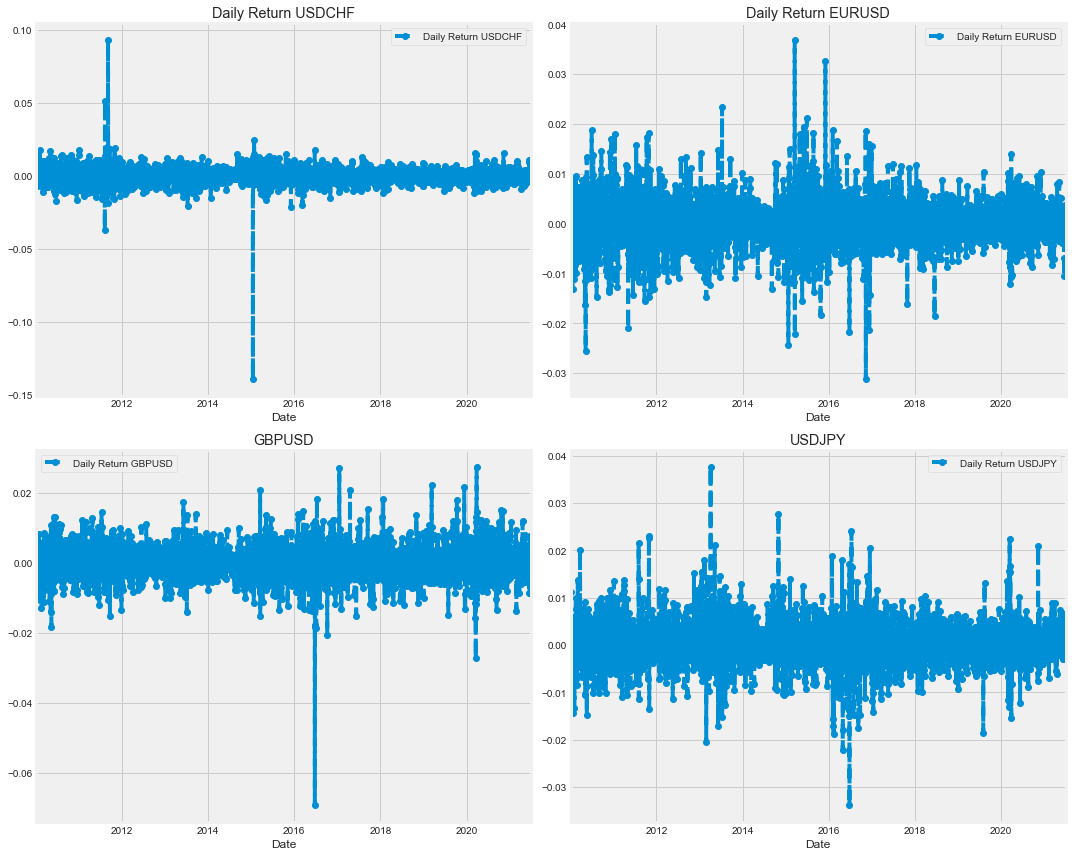

In [82]:
fig, axes = plt.subplots(nrows=2, ncols=2)
fig.set_figheight(12)
fig.set_figwidth(15)

data['Daily Return USDCHF'].plot(ax=axes[0,0], legend=True, linestyle='--', marker='o')
axes[0,0].set_title('Daily Return USDCHF')

data['Daily Return EURUSD'].plot(ax=axes[0,1], legend=True, linestyle='--', marker='o')
axes[0,1].set_title('Daily Return EURUSD')

data['Daily Return GBPUSD'].plot(ax=axes[1,0], legend=True, linestyle='--', marker='o')
axes[1,0].set_title('GBPUSD')

data['Daily Return USDJPY'].plot(ax=axes[1,1], legend=True, linestyle='--', marker='o')
axes[1,1].set_title('USDJPY')

fig.tight_layout()

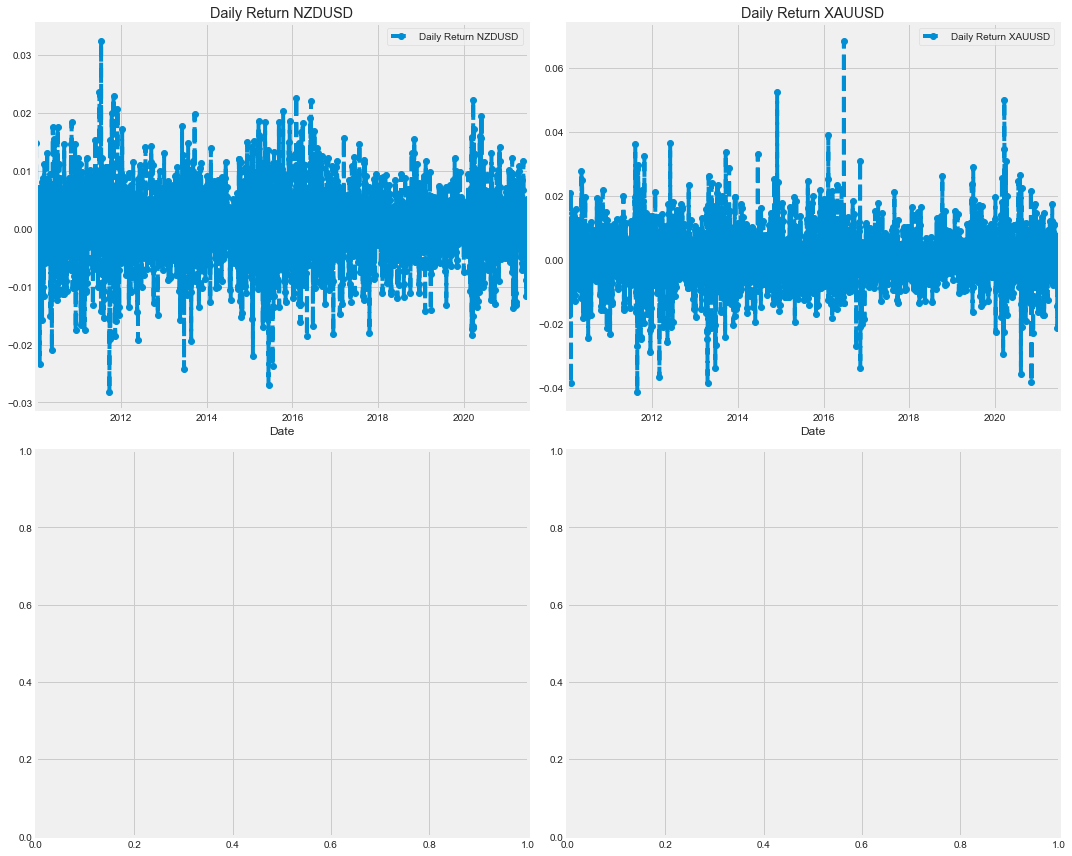

In [83]:
fig, axes = plt.subplots(nrows=2, ncols=2)
fig.set_figheight(12)
fig.set_figwidth(15)

data['Daily Return NZDUSD'].plot(ax=axes[0,0], legend=True, linestyle='--', marker='o')
axes[0,0].set_title('Daily Return NZDUSD')

data['Daily Return XAUUSD'].plot(ax=axes[0,1], legend=True, linestyle='--', marker='o')
axes[0,1].set_title('Daily Return XAUUSD')


fig.tight_layout()

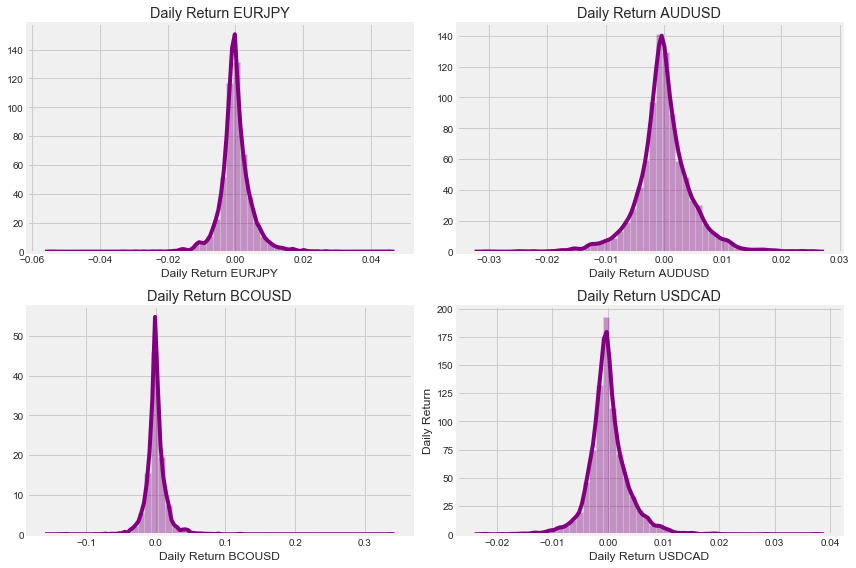

In [84]:
# Note the use of dropna() here, otherwise the NaN values can't be read by seaborn


fig, axes = plt.subplots(nrows=2, ncols=2)
fig.set_figheight(8)
fig.set_figwidth(12)

sns.distplot(data['Daily Return EURJPY'].dropna(), bins=50, color='purple',ax=axes[0,0]).set_title('Daily Return EURJPY')
plt.ylabel('Daily Return')

sns.distplot(data['Daily Return AUDUSD'].dropna(), bins=50, color='purple',ax=axes[0,1]).set_title('Daily Return AUDUSD')
plt.ylabel('Daily Return')

sns.distplot(data['Daily Return BCOUSD'].dropna(), bins=50, color='purple',ax=axes[1,0]).set_title('Daily Return BCOUSD')
plt.ylabel('Daily Return')

sns.distplot(data['Daily Return USDCAD'].dropna(), bins=50, color='purple',ax=axes[1,1]).set_title('Daily Return USDCAD')
plt.ylabel('Daily Return')

fig.tight_layout()

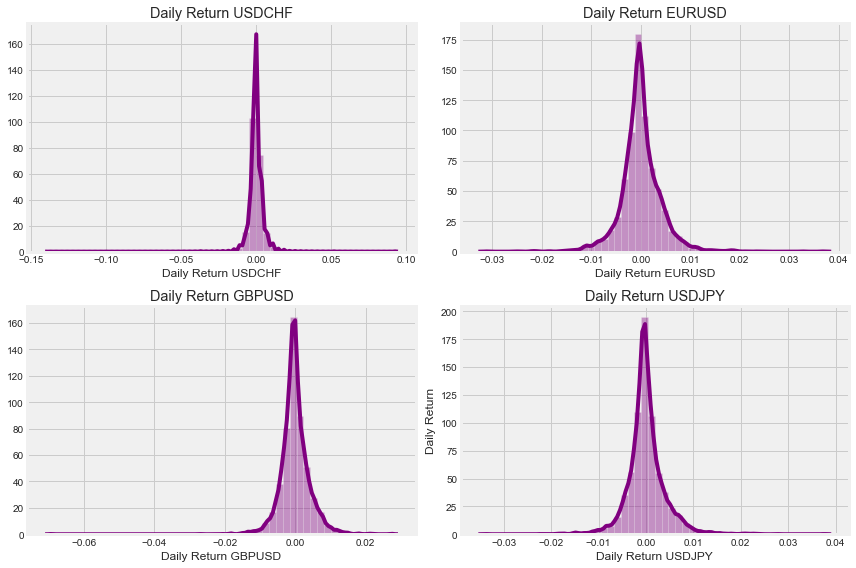

In [85]:
fig, axes = plt.subplots(nrows=2, ncols=2)
fig.set_figheight(8)
fig.set_figwidth(12)

sns.distplot(data['Daily Return USDCHF'].dropna(), bins=50, color='purple',ax=axes[0,0]).set_title('Daily Return USDCHF')
plt.ylabel('Daily Return')

sns.distplot(data['Daily Return EURUSD'].dropna(), bins=50, color='purple',ax=axes[0,1]).set_title('Daily Return EURUSD')
plt.ylabel('Daily Return')

sns.distplot(data['Daily Return GBPUSD'].dropna(), bins=50, color='purple',ax=axes[1,0]).set_title('Daily Return GBPUSD')
plt.ylabel('Daily Return')

sns.distplot(data['Daily Return USDJPY'].dropna(), bins=50, color='purple',ax=axes[1,1]).set_title('Daily Return USDJPY')
plt.ylabel('Daily Return')

fig.tight_layout()

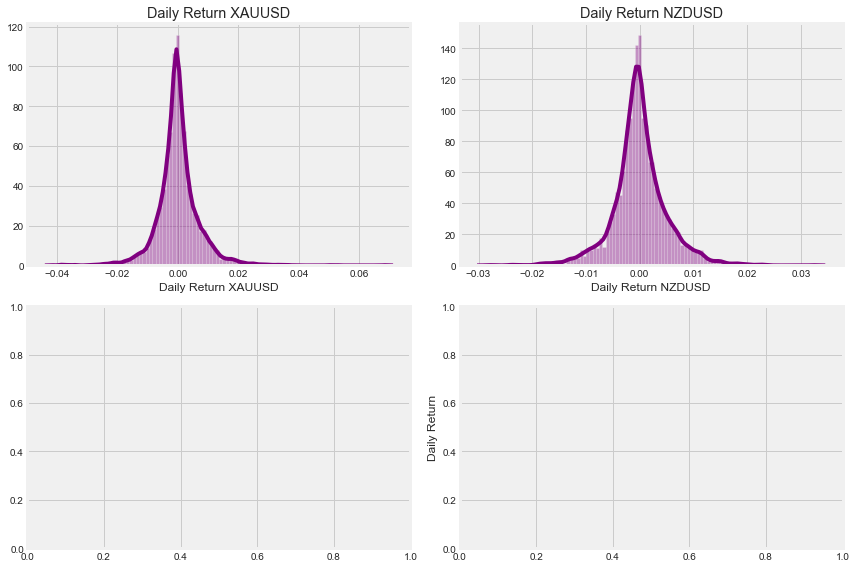

In [86]:
# Note the use of dropna() here, otherwise the NaN values can't be read by seaborn


fig, axes = plt.subplots(nrows=2, ncols=2)
fig.set_figheight(8)
fig.set_figwidth(12)

sns.distplot(data['Daily Return XAUUSD'].dropna(), bins=100, color='purple',ax=axes[0,0]).set_title('Daily Return XAUUSD')
plt.ylabel('Daily Return')

sns.distplot(data['Daily Return NZDUSD'].dropna(), bins=100, color='purple',ax=axes[0,1]).set_title('Daily Return NZDUSD')
plt.ylabel('Daily Return')

fig.tight_layout()

In [87]:
data.head()

EURJPY  AUDUSD  BCOUSD  USDCAD  USDCHF  EURUSD  GBPUSD  USDJPY  \
Date                                                                         
2010-01-03  133.31  0.8996     NaN  1.0518  1.0395  1.4335  1.6147   93.08   
2010-01-04  133.77  0.9159     NaN  1.0487  1.0417  1.4451  1.6236   93.20   
2010-01-05  132.92  0.9172     NaN  1.0409  1.0356  1.4481  1.6151   92.15   
2010-01-06  133.47  0.9263     NaN  1.0406  1.0375  1.4443  1.6061   92.71   
2010-01-07  134.10  0.9226     NaN  1.0371  1.0367  1.4402  1.6003   93.75   

            NZDUSD   XAUUSD  10 Days MA for EURJPY  10 Days MA for AUDUSD  \
Date                                                                        
2010-01-03  0.7251  1102.03                    NaN                    NaN   
2010-01-04  0.7358  1123.70                    NaN                    NaN   
2010-01-05  0.7389  1127.78                    NaN                    NaN   
2010-01-06  0.7421  1140.10                    NaN                    NaN   
2010-01-07  0.7384  1135.08                    NaN                    NaN   

            10 Days MA for BCOUSD  10 Days MA for USDCAD  \
Date                                                       
2010-01-03                    NaN                    NaN   
2010-01-04                    NaN                    NaN   
2010-01-05                    NaN                    NaN   
2010-01-06                    NaN                    NaN   
2010-01-07                    NaN                    NaN   

            10 Days MA for USDCHF  10 Days MA for EURUSD  \
Date                                                       
2010-01-03                    NaN                    NaN   
2010-01-04                    NaN                    NaN   
2010-01-05                    NaN                    NaN   
2010-01-06                    NaN                    NaN   
2010-01-07                    NaN                    NaN   

            10 Days MA for GBPUSD  10 Days MA for USDJPY  \
Date                                                       
2010-01-03                    NaN                    NaN   
2010-01-04                    NaN                    NaN   
2010-01-05                    NaN                    NaN   
2010-01-06                    NaN                    NaN   
2010-01-07                    NaN                    NaN   

            10 Days MA for NZDUSD  10 Days MA for XAUUSD  \
Date                                                       
2010-01-03                    NaN                    NaN   
2010-01-04                    NaN                    NaN   
2010-01-05                    NaN                    NaN   
2010-01-06                    NaN                    NaN   
2010-01-07                    NaN                    NaN   

            20 Days MA for EURJPY  20 Days MA for AUDUSD  \
Date                                                       
2010-01-03                    NaN                    NaN   
2010-01-04                    NaN                    NaN   
2010-01-05                    NaN                    NaN   
2010-01-06                    NaN                    NaN   
2010-01-07                    NaN                    NaN   

            20 Days MA for BCOUSD  20 Days MA for USDCAD  \
Date                                                       
2010-01-03                    NaN                    NaN   
2010-01-04                    NaN                    NaN   
2010-01-05                    NaN                    NaN   
2010-01-06                    NaN                    NaN   
2010-01-07                    NaN                    NaN   

            20 Days MA for USDCHF  20 Days MA for EURUSD  \
Date                                                       
2010-01-03                    NaN                    NaN   
2010-01-04                    NaN                    NaN   
2010-01-05                    NaN                    NaN   
2010-01-06                    NaN                    NaN   
2010-01-07                    NaN      

In [88]:
data_new=data.filter(['EURJPY', 'AUDUSD', 'BCOUSD', 'USDCAD', 'USDCHF', 'EURUSD', 'GBPUSD', 'USDJPY', 'NZDUSD', 'XAUUSD'],axis=1)

In [89]:
data_new.head()

EURJPY  AUDUSD  BCOUSD  USDCAD  USDCHF  EURUSD  GBPUSD  USDJPY  \
Date                                                                         
2010-01-03  133.31  0.8996     NaN  1.0518  1.0395  1.4335  1.6147   93.08   
2010-01-04  133.77  0.9159     NaN  1.0487  1.0417  1.4451  1.6236   93.20   
2010-01-05  132.92  0.9172     NaN  1.0409  1.0356  1.4481  1.6151   92.15   
2010-01-06  133.47  0.9263     NaN  1.0406  1.0375  1.4443  1.6061   92.71   
2010-01-07  134.10  0.9226     NaN  1.0371  1.0367  1.4402  1.6003   93.75   

            NZDUSD   XAUUSD  
Date                         
2010-01-03  0.7251  1102.03  
2010-01-04  0.7358  1123.70  
2010-01-05  0.7389  1127.78  
2010-01-06  0.7421  1140.10  
2010-01-07  0.7384  1135.08

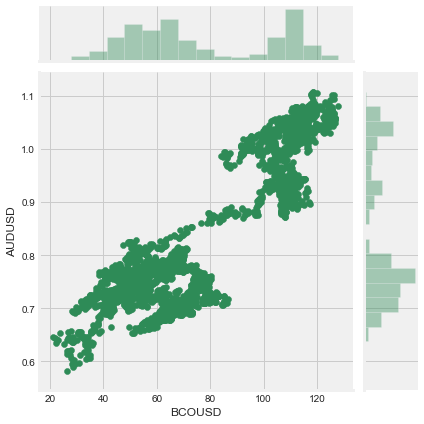

In [90]:
# Comparing Google to itself should show a perfectly linear relationship
sns.jointplot('BCOUSD', 'AUDUSD', data_new, kind='scatter', color='seagreen')

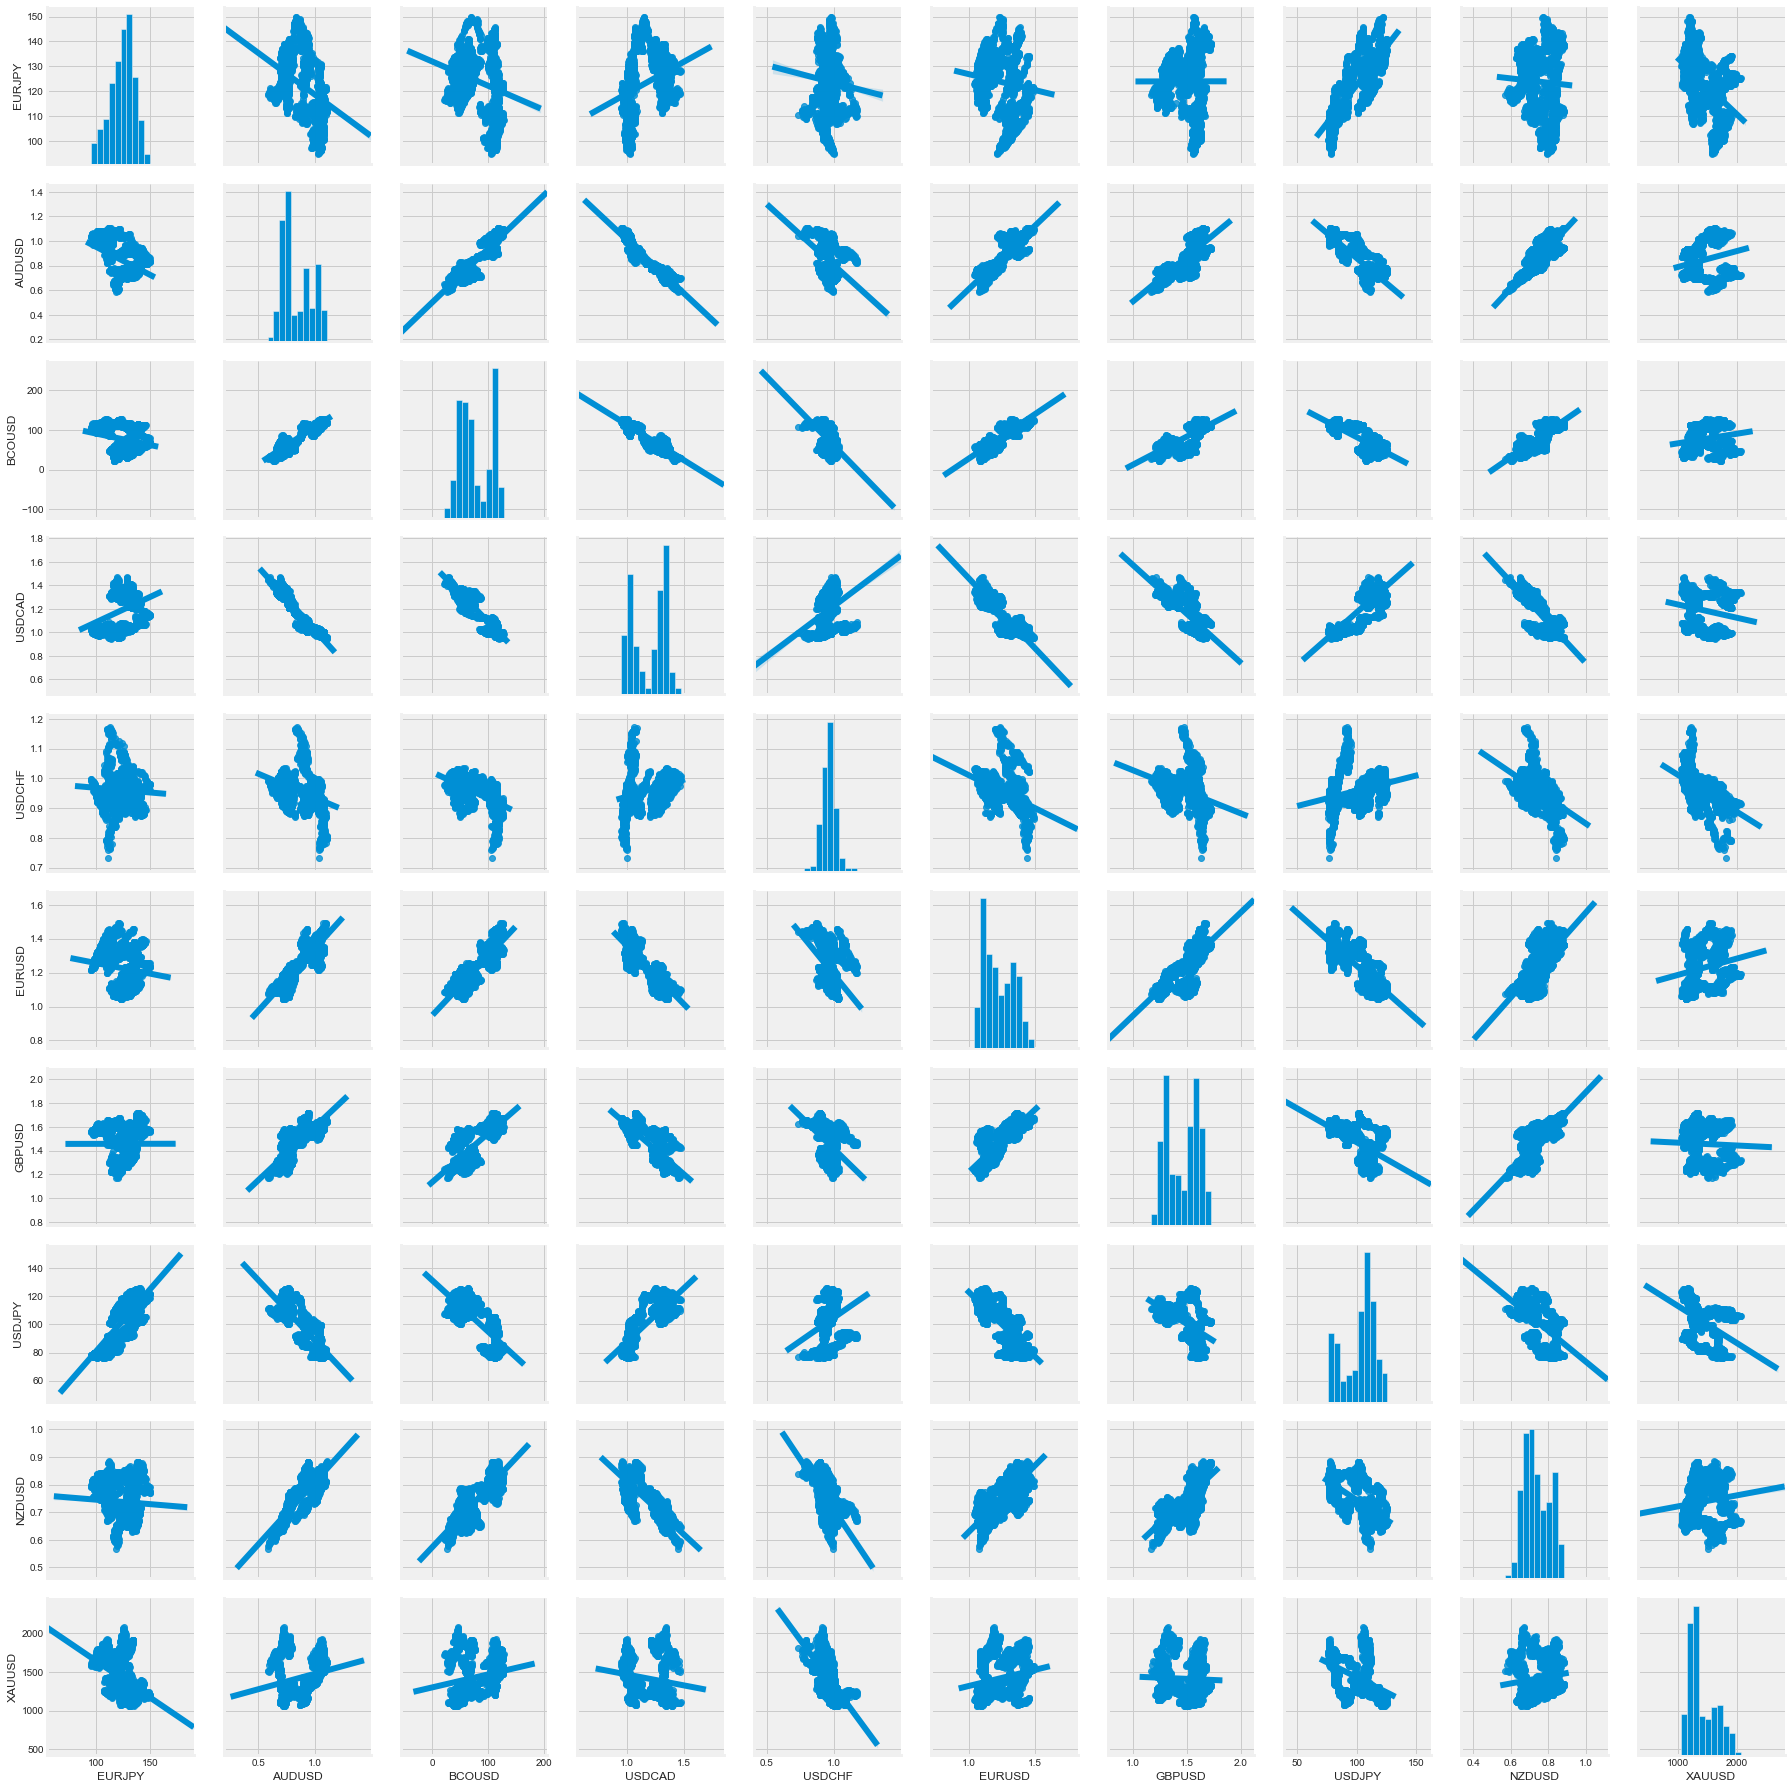

In [91]:
sns.pairplot(data_new, kind='reg')

In [92]:
data_new

EURJPY    AUDUSD   BCOUSD    USDCAD   USDCHF    EURUSD   GBPUSD  \
Date                                                                           
2010-01-03  133.310  0.899600      NaN  1.051800  1.03950  1.433500  1.61470   
2010-01-04  133.770  0.915900      NaN  1.048700  1.04170  1.445100  1.62360   
2010-01-05  132.920  0.917200      NaN  1.040900  1.03560  1.448100  1.61510   
2010-01-06  133.470  0.926300      NaN  1.040600  1.03750  1.444300  1.60610   
2010-01-07  134.100  0.922600      NaN  1.037100  1.03670  1.440200  1.60030   
...             ...       ...      ...       ...      ...       ...      ...   
2021-06-26  132.369  0.760495  75.9455  1.231465  0.91855  1.195765  1.39134   
2021-06-27  132.339  0.759410  75.7180  1.231290  0.91887  1.194150  1.38957   
2021-06-28  132.224  0.760050  75.4030  1.234810  0.92141  1.194380  1.39386   
2021-06-29  131.874  0.756380  74.9080  1.240290  0.92309  1.192230  1.38786   
2021-06-30  131.778  0.752650  75.2730  1.242220  0.92618  1.190790  1.38704   

             USDJPY   NZDUSD    XAUUSD  
Date                                    
2010-01-03   93.080  0.72510  1102.030  
2010-01-04   93.200  0.73580  1123.700  
2010-01-05   92.150  0.73890  1127.780  
2010-01-06   92.710  0.74210  1140.100  
2010-01-07   93.750  0.73840  1135.080  
...             ...      ...       ...  
2021-06-26  110.854  0.70862  1786.258  
2021-06-27  110.833  0.70778  1782.698  
2021-06-28  110.972  0.70851  1785.608  
2021-06-29  110.749  0.70364  1778.708  
2021-06-30  111.159  0.70058  1775.838  

[4197 rows x 10 columns]

In [93]:
data_cluster1= data_new[['AUDUSD','EURUSD','GBPUSD','NZDUSD','BCOUSD']]
data_cluster2= data_new[['EURJPY','USDCAD','USDJPY']]
data_cluster3= data_new[['USDCHF','GBPUSD']]
data_cluster4= data_new[['XAUUSD','BCOUSD']]

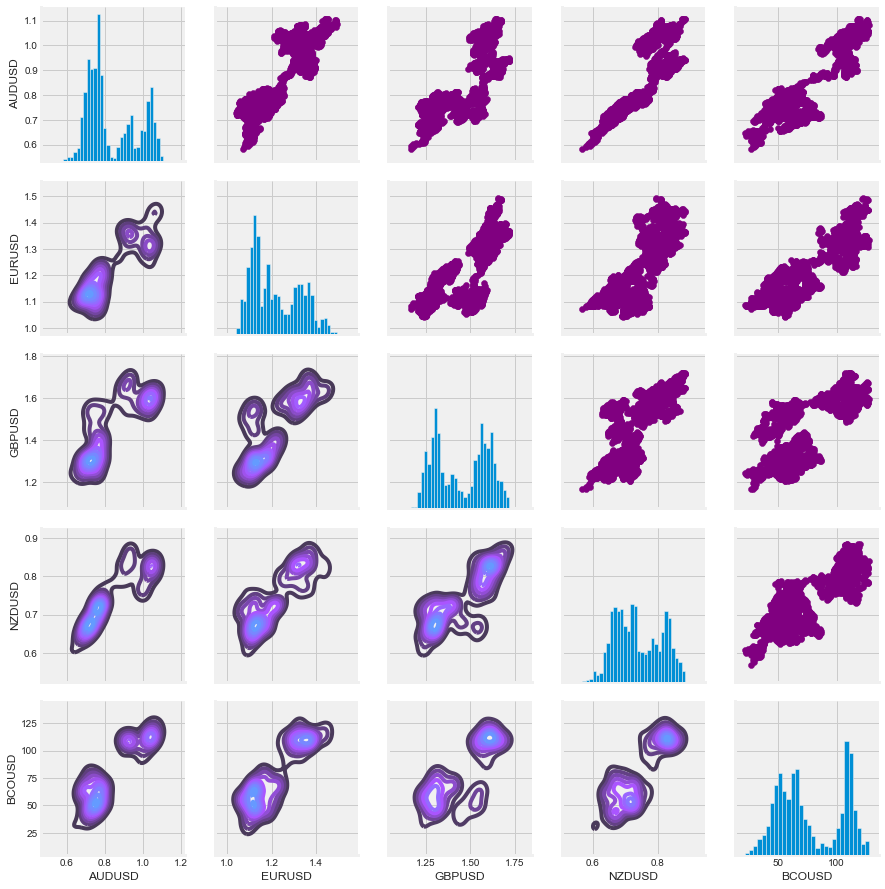

In [94]:
# Set up our figure by naming it returns_fig, call PairPLot on the DataFrame
return_fig = sns.PairGrid(data_cluster1.dropna())

# Using map_upper we can specify what the upper triangle will look like.
return_fig.map_upper(plt.scatter, color='purple')

# We can also define the lower triangle in the figure, inclufing the plot type (kde) 
# or the color map (BluePurple)
return_fig.map_lower(sns.kdeplot, cmap='cool_d')

# Finally we'll define the diagonal as a series of histogram plots of the daily return
return_fig.map_diag(plt.hist, bins=30)

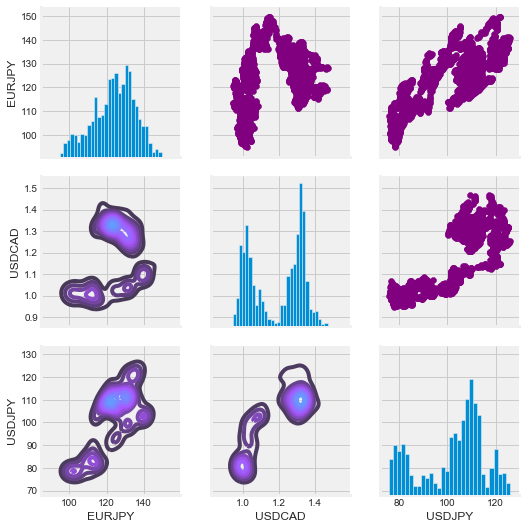

In [95]:
# Set up our figure by naming it returns_fig, call PairPLot on the DataFrame
return_fig = sns.PairGrid(data_cluster2.dropna())

# Using map_upper we can specify what the upper triangle will look like.
return_fig.map_upper(plt.scatter, color='purple')

# We can also define the lower triangle in the figure, inclufing the plot type (kde) 
# or the color map (BluePurple)
return_fig.map_lower(sns.kdeplot, cmap='cool_d')

# Finally we'll define the diagonal as a series of histogram plots of the daily return
return_fig.map_diag(plt.hist, bins=30)

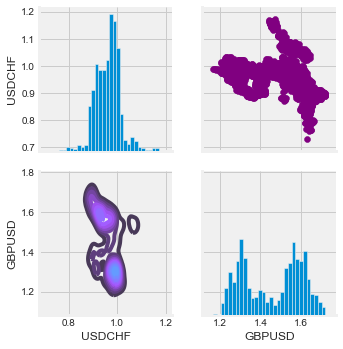

In [96]:
# Set up our figure by naming it returns_fig, call PairPLot on the DataFrame
return_fig = sns.PairGrid(data_cluster3.dropna())

# Using map_upper we can specify what the upper triangle will look like.
return_fig.map_upper(plt.scatter, color='purple')

# We can also define the lower triangle in the figure, inclufing the plot type (kde) 
# or the color map (BluePurple)
return_fig.map_lower(sns.kdeplot, cmap='cool_d')

# Finally we'll define the diagonal as a series of histogram plots of the daily return
return_fig.map_diag(plt.hist, bins=30)

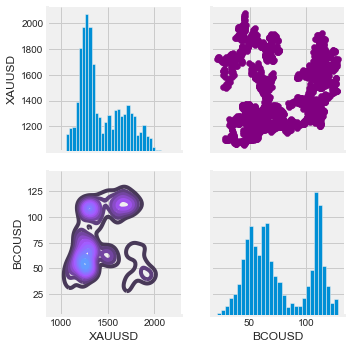

In [97]:
# Set up our figure by naming it returns_fig, call PairPLot on the DataFrame
return_fig = sns.PairGrid(data_cluster4.dropna())

# Using map_upper we can specify what the upper triangle will look like.
return_fig.map_upper(plt.scatter, color='purple')

# We can also define the lower triangle in the figure, inclufing the plot type (kde) 
# or the color map (BluePurple)
return_fig.map_lower(sns.kdeplot, cmap='cool_d')

# Finally we'll define the diagonal as a series of histogram plots of the daily return
return_fig.map_diag(plt.hist, bins=30)

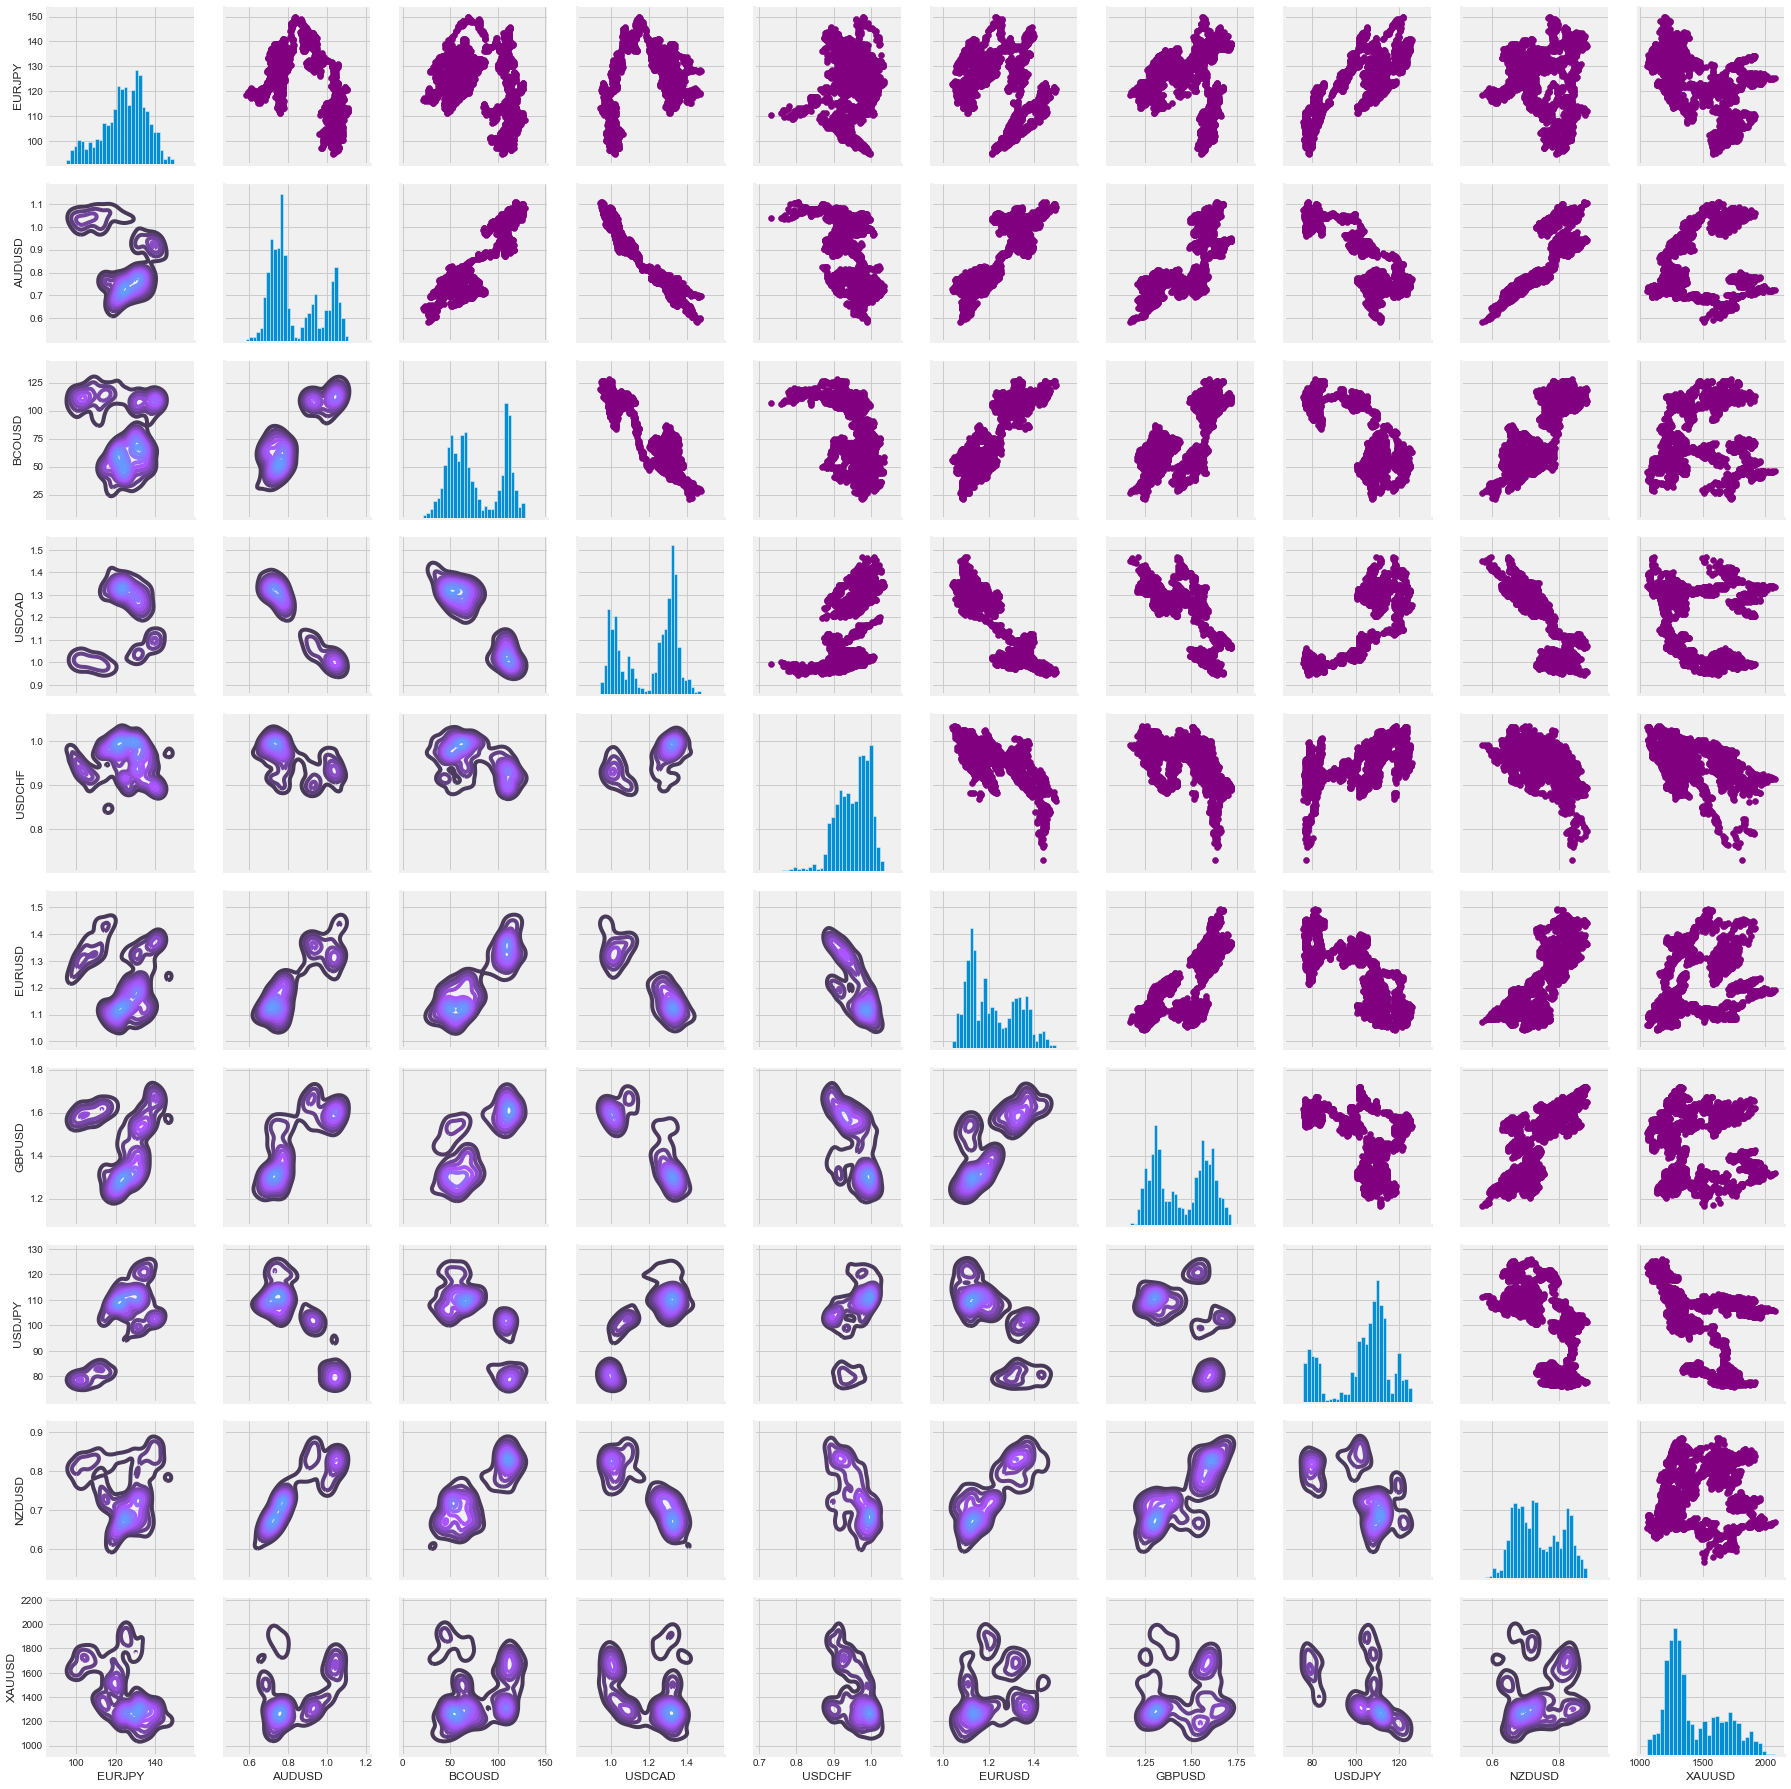

In [98]:
# Set up our figure by naming it returns_fig, call PairPLot on the DataFrame
return_fig = sns.PairGrid(data_new.dropna())

# Using map_upper we can specify what the upper triangle will look like.
return_fig.map_upper(plt.scatter, color='purple')

# We can also define the lower triangle in the figure, inclufing the plot type (kde) 
# or the color map (BluePurple)
return_fig.map_lower(sns.kdeplot, cmap='cool_d')

# Finally we'll define the diagonal as a series of histogram plots of the daily return
return_fig.map_diag(plt.hist, bins=30)

In [99]:
# Make a new tech returns DataFrame
tech_rets = data_new.pct_change()
tech_rets.head()

EURJPY    AUDUSD  BCOUSD    USDCAD    USDCHF    EURUSD  \
Date                                                                   
2010-01-03       NaN       NaN     NaN       NaN       NaN       NaN   
2010-01-04  0.003451  0.018119     NaN -0.002947  0.002116  0.008092   
2010-01-05 -0.006354  0.001419     NaN -0.007438 -0.005856  0.002076   
2010-01-06  0.004138  0.009922     NaN -0.000288  0.001835 -0.002624   
2010-01-07  0.004720 -0.003994     NaN -0.003363 -0.000771 -0.002839   

              GBPUSD    USDJPY    NZDUSD    XAUUSD  
Date                                                
2010-01-03       NaN       NaN       NaN       NaN  
2010-01-04  0.005512  0.001289  0.014757  0.019664  
2010-01-05 -0.005235 -0.011266  0.004213  0.003631  
2010-01-06 -0.005572  0.006077  0.004331  0.010924  
2010-01-07 -0.003611  0.011218 -0.004986 -0.004403

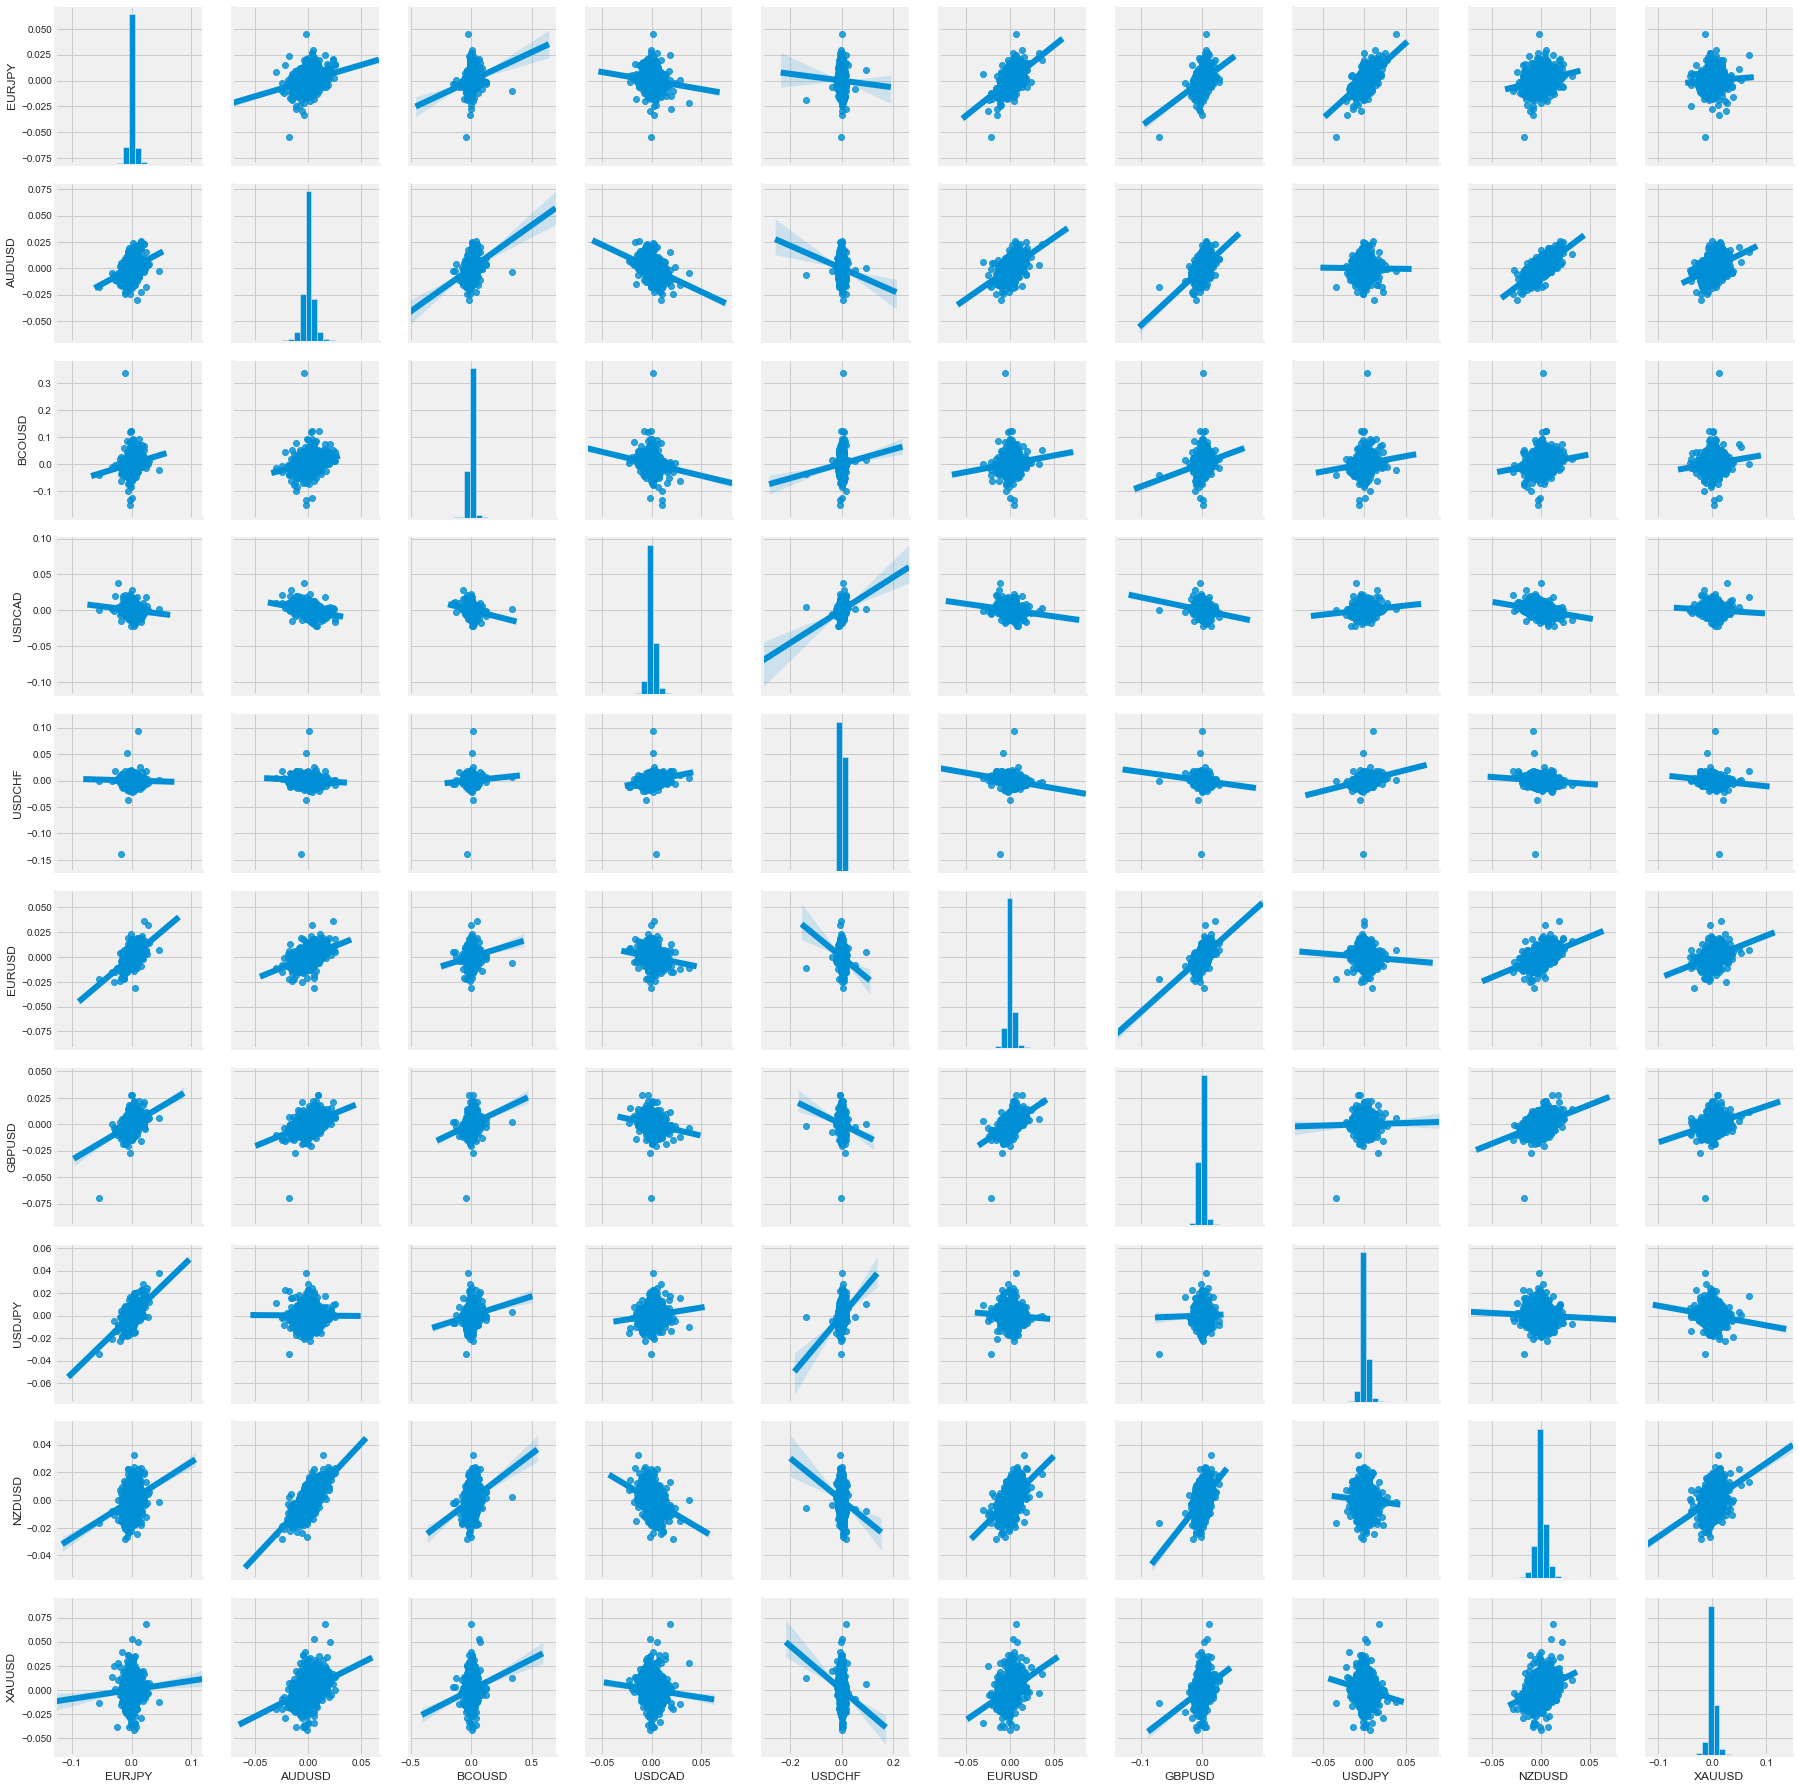

In [100]:
# We can simply call pairplot on our DataFrame for an automatic visual analysis 
# of all the comparisons

sns.pairplot(tech_rets, kind='reg')

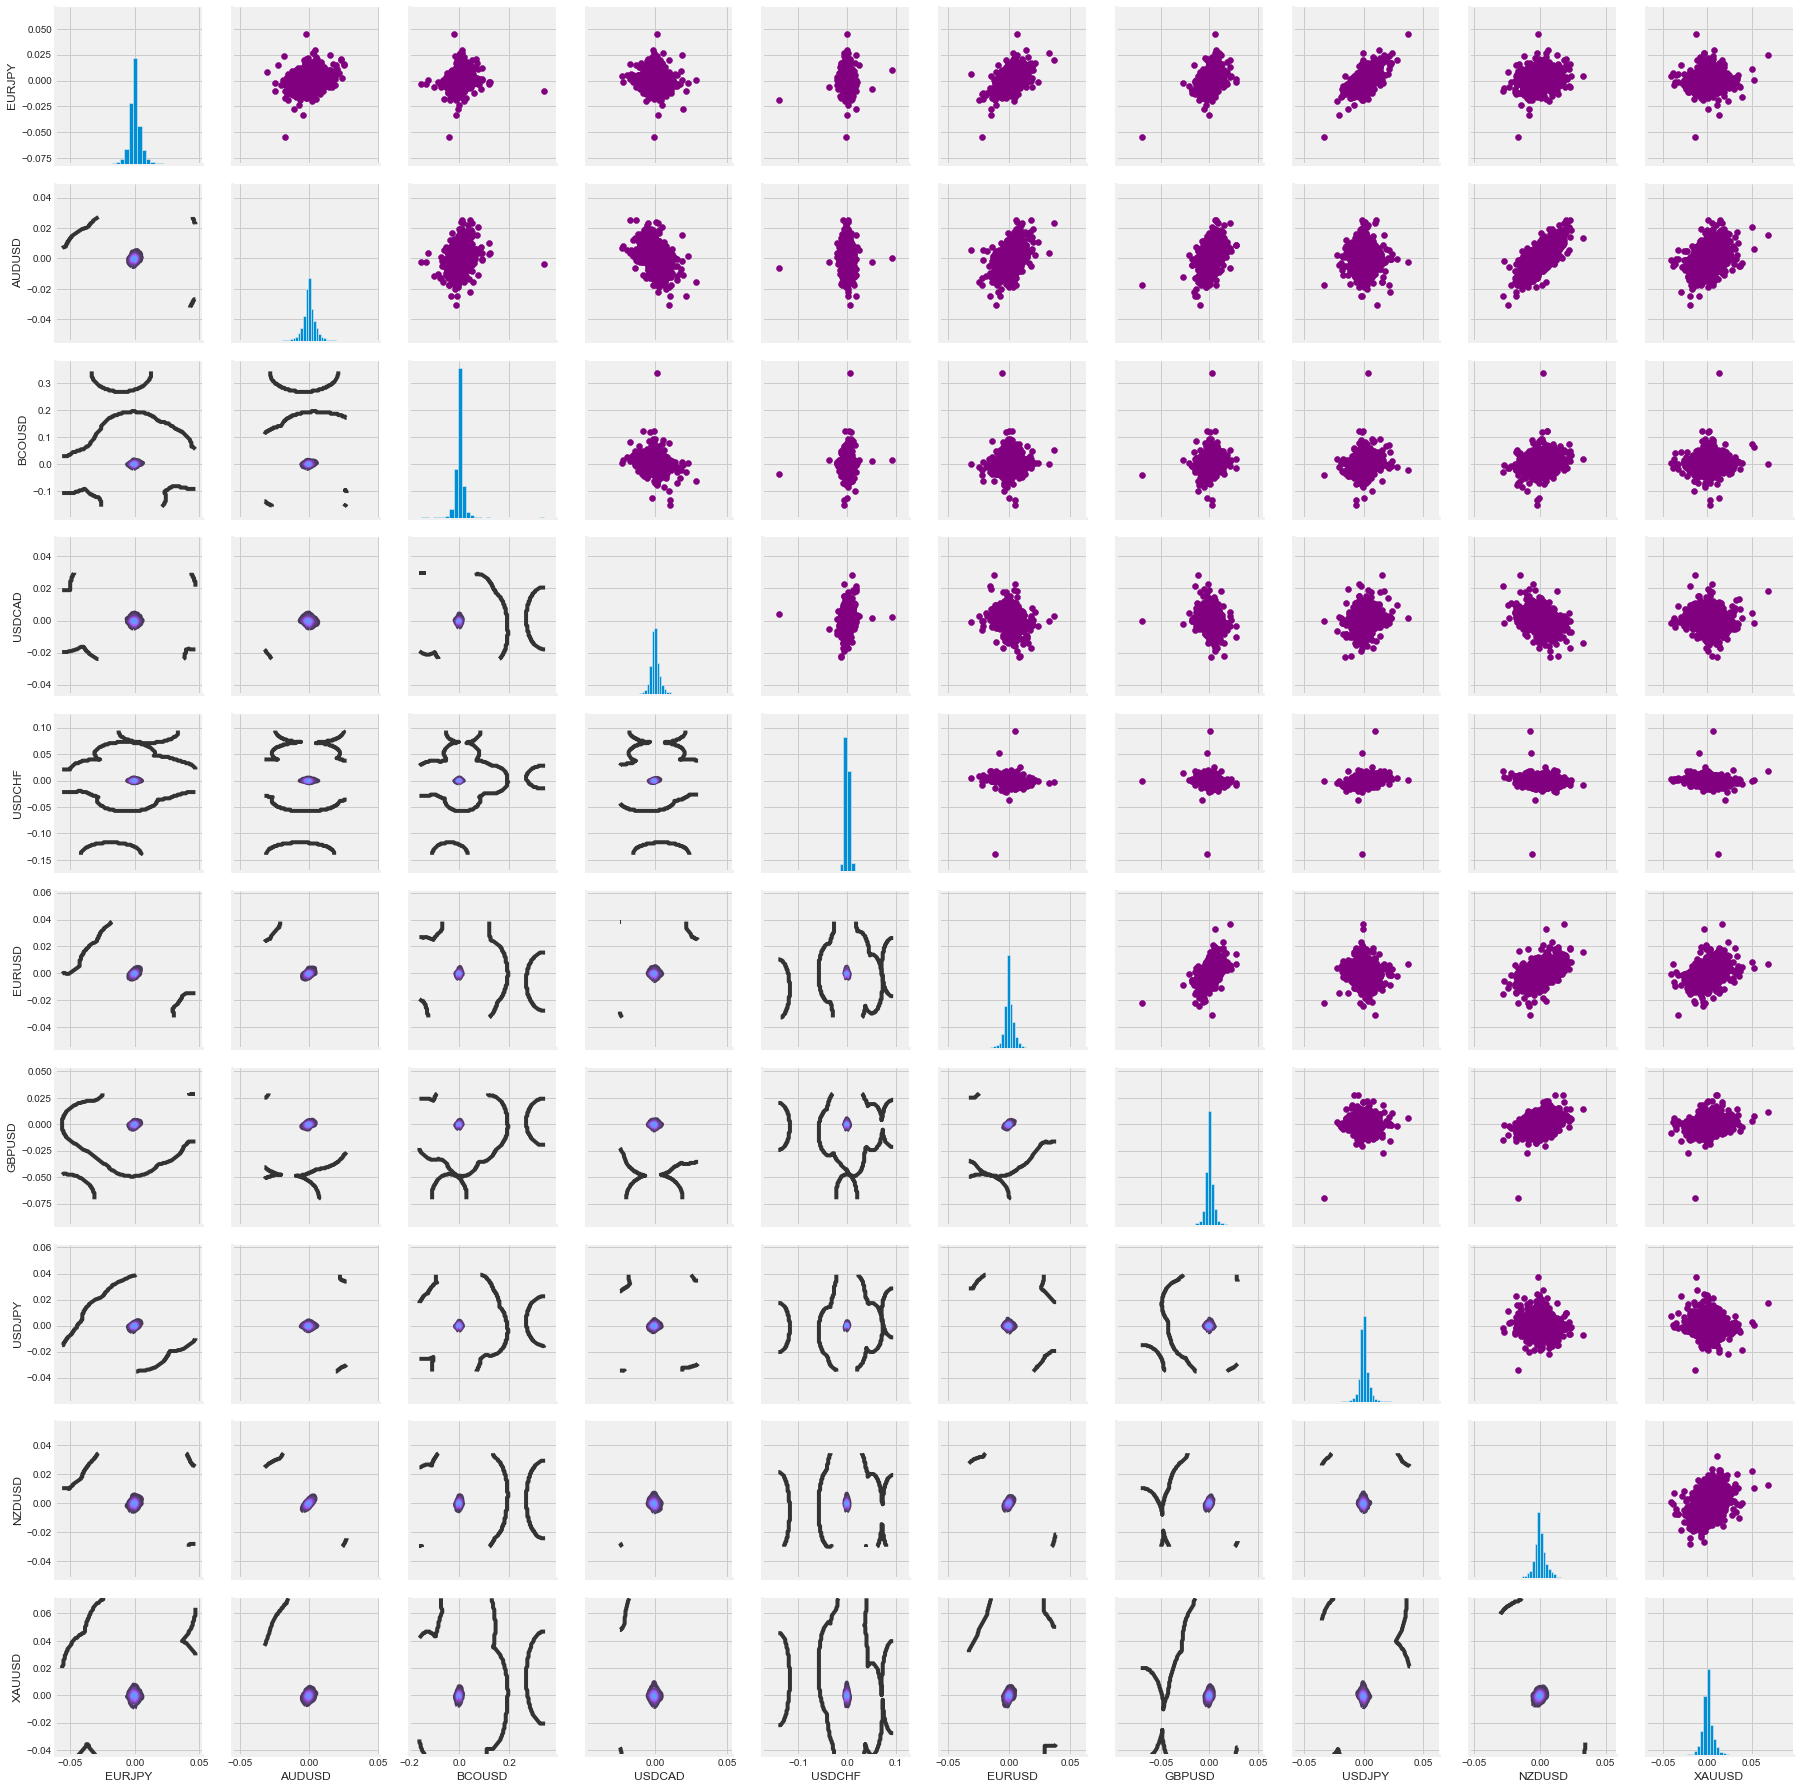

In [101]:
# Set up our figure by naming it returns_fig, call PairPLot on the DataFrame
return_fig = sns.PairGrid(tech_rets.dropna())

# Using map_upper we can specify what the upper triangle will look like.
return_fig.map_upper(plt.scatter, color='purple')

# We can also define the lower triangle in the figure, inclufing the plot type (kde) 
# or the color map (BluePurple)
return_fig.map_lower(sns.kdeplot, cmap='cool_d')

# Finally we'll define the diagonal as a series of histogram plots of the daily return
return_fig.map_diag(plt.hist, bins=30)

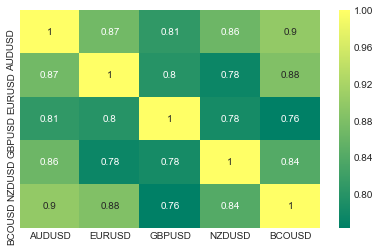

In [114]:
sns.heatmap(data_cluster1.corr(), annot=True, cmap='summer')

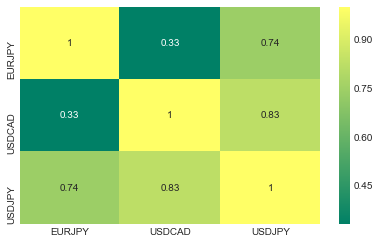

In [115]:
sns.heatmap(data_cluster2.corr(), annot=True, cmap='summer')

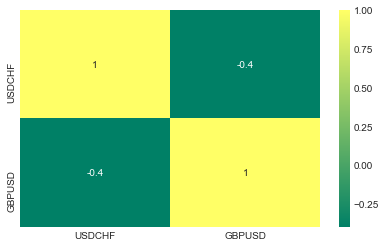

In [116]:
sns.heatmap(data_cluster3.corr(), annot=True, cmap='summer')

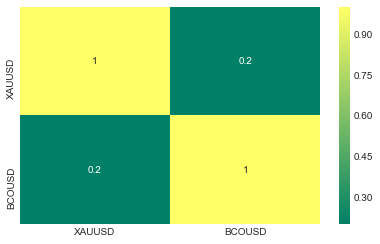

In [117]:
sns.heatmap(data_cluster4.corr(), annot=True, cmap='summer')

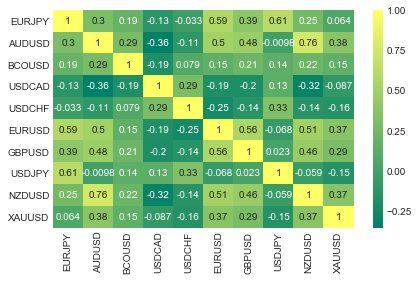

In [106]:
# Let's go ahead and use sebron for a quick correlation plot for the daily returns
sns.heatmap(tech_rets.corr(), annot=True, cmap='summer')

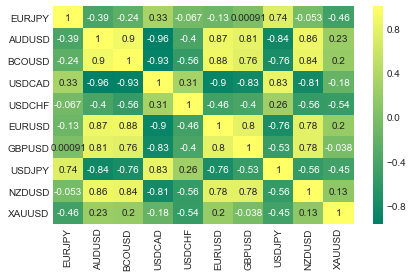

In [107]:
sns.heatmap(data_new.corr(), annot=True, cmap='summer')

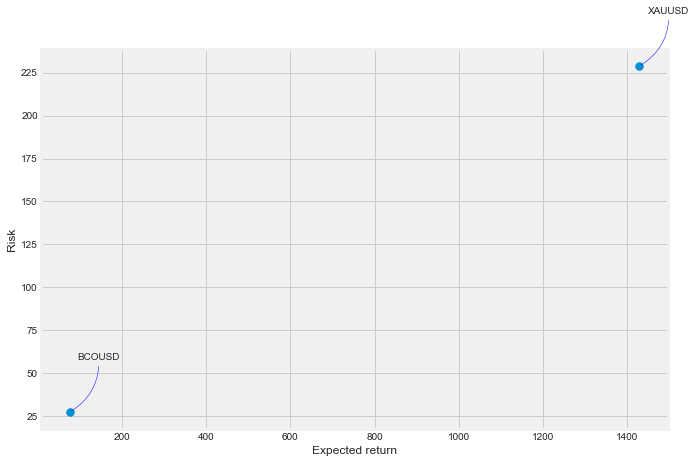

In [108]:
# Let's start by defining a new DataFrame as a clenaed version of the oriignal tech_rets DataFrame
rets = data_cluster4.dropna()

area = np.pi * 20

plt.figure(figsize=(10, 7))
plt.scatter(rets.mean(), rets.std(), s=area)
plt.xlabel('Expected return')
plt.ylabel('Risk')

for label, x, y in zip(rets.columns, rets.mean(), rets.std()):
    plt.annotate(label, xy=(x, y), xytext=(50, 50), textcoords='offset points', ha='right', va='bottom', 
                 arrowprops=dict(arrowstyle='-', color='blue', connectionstyle='arc3,rad=-0.3'))

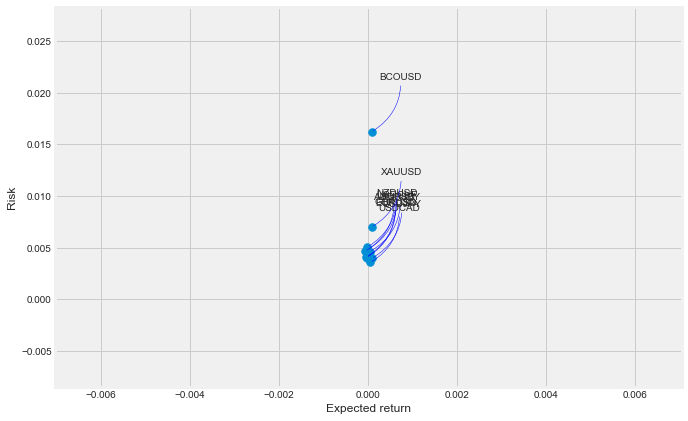

In [109]:
# Let's start by defining a new DataFrame as a clenaed version of the oriignal tech_rets DataFrame
rets = tech_rets.dropna()

area = np.pi * 20

plt.figure(figsize=(10, 7))
plt.scatter(rets.mean(), rets.std(), s=area)
plt.xlabel('Expected return')
plt.ylabel('Risk')

for label, x, y in zip(rets.columns, rets.mean(), rets.std()):
    plt.annotate(label, xy=(x, y), xytext=(50, 50), textcoords='offset points', ha='right', va='bottom', 
                 arrowprops=dict(arrowstyle='-', color='blue', connectionstyle='arc3,rad=-0.3'))